<a href="https://colab.research.google.com/github/Zaynulaabaidin/Diabetes-Prediction-Using-Classification-Method/blob/main/Brain_Tumor_Segmentation_with_YOLO_11_and_SAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
# Install a specific version (8.3.118) of the Ultralytics package, which includes the YOLO models
!pip install ultralytics==8.3.118

# Print a confirmation message after successful installation
print("Dependency Successfully installed")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
# Import the YOLO class from the ultralytics library
from ultralytics import YOLO

# Load a pre-trained YOLOv11 nano model using the weights file 'yolo11n.pt'
yolo_model = YOLO('yolo11n.pt')

# Print a success message after the model is loaded
print("\nYOLOv11 Model installed Successfully")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 109MB/s]


YOLOv11 Model installed Successfully


In [3]:
# Import the SAM class from the ultralytics library
from ultralytics import SAM

# Print a success message after importing SAM
print("SAMv2 Model installed Successfully for masking objects")

# Load a pre-trained SAMv2 model using the weights file 'sam2_b.pt'
sam_model = SAM("sam2_b.pt")

# Print a success message after the model is loaded
print("SAM2 Model installed Successfully")

SAMv2 Model installed Successfully for masking objects


100%|██████████| 154M/154M [00:00<00:00, 245MB/s]


SAM2 Model installed Successfully


#Import Dataset

In [4]:
# Import the drive module from Google Colab to access Google Drive
from google.colab import drive

# Mount Google Drive to the Colab environment at the specified path
drive.mount('/content/drive')

Mounted at /content/drive


#Fine Tune the Pre-train Uploaded Yolo11 Model

In [5]:
# Train the YOLO model
train_results = yolo_model.train(
    data="/content/drive/MyDrive/ColabNotebooks/Folder/BRAINTUMOR/data.yaml",  # Path to the dataset configuration file (data.yaml)
    epochs=20,                                                          # Number of training epochs
    imgsz=640,                                                          # Input image size (YOLO resizes images to 640x640 during training)
    device="0"                                                       # Use GPU for faster processing
)

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/ColabNotebooks/Folder/BRAINTUMOR/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 22.3MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

 23        [16, 19, 22]  1    430867  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
YOLO11n summary: 181 layers, 2,590,035 parameters, 2,590,019 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.3±0.1 MB/s, size: 63.6 KB)


train: Scanning /content/drive/MyDrive/ColabNotebooks/Folder/BRAINTUMOR/train/labels.cache... 583 images, 2 backgrounds, 0 corrupt: 100%|██████████| 583/583 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.8±0.3 ms, read: 0.3±0.2 MB/s, size: 67.9 KB)


val: Scanning /content/drive/MyDrive/ColabNotebooks/Folder/BRAINTUMOR/valid/labels.cache... 123 images, 1 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.26G      1.091      2.748       1.29          7        640: 100%|██████████| 37/37 [00:16<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.18s/it]

                   all        123        126          1      0.133      0.642       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.65G      1.114      1.983      1.245          8        640: 100%|██████████| 37/37 [00:12<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        123        126      0.646      0.587      0.636      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.66G       1.21      1.796      1.313         11        640: 100%|██████████| 37/37 [00:12<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        123        126      0.447      0.493      0.503       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.66G      1.191      1.565      1.298         14        640: 100%|██████████| 37/37 [00:12<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        123        126      0.847      0.762      0.864      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.67G      1.146      1.413      1.284         16        640: 100%|██████████| 37/37 [00:11<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        123        126      0.911      0.889      0.945      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.69G      1.105      1.245      1.258         17        640: 100%|██████████| 37/37 [00:12<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        123        126      0.908      0.873      0.939      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.69G      1.106      1.188      1.242         13        640: 100%|██████████| 37/37 [00:11<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        123        126      0.891       0.81      0.918      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.69G      1.064      1.071      1.205         13        640: 100%|██████████| 37/37 [00:12<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        123        126      0.651      0.857      0.792      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.72G      1.097      1.049      1.246         13        640: 100%|██████████| 37/37 [00:12<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        123        126      0.875      0.929      0.951      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.72G      1.044     0.9686      1.209         10        640: 100%|██████████| 37/37 [00:12<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        123        126      0.918      0.865      0.943      0.699


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.72G     0.9205     0.8524      1.158          7        640: 100%|██████████| 37/37 [00:12<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        123        126      0.937      0.948      0.977      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.72G     0.9022     0.7663      1.165          7        640: 100%|██████████| 37/37 [00:11<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        123        126      0.959      0.968      0.981       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.73G     0.8893     0.6897      1.144          8        640: 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        123        126      0.944      0.936      0.972      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.74G     0.8594     0.6582      1.122          8        640: 100%|██████████| 37/37 [00:11<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        123        126      0.938      0.955      0.982      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.74G     0.7943     0.6055      1.077          7        640: 100%|██████████| 37/37 [00:10<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        123        126      0.984      0.976      0.988      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.74G     0.7671     0.5508      1.065          7        640: 100%|██████████| 37/37 [00:10<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        123        126      0.968      0.984      0.986      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.74G     0.7728     0.5455      1.072          7        640: 100%|██████████| 37/37 [00:09<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        123        126      0.959      0.984      0.991      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.74G     0.7363     0.5218      1.054          7        640: 100%|██████████| 37/37 [00:10<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        123        126      0.954      0.984      0.991      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.74G     0.7317     0.4967      1.048          7        640: 100%|██████████| 37/37 [00:11<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        123        126      0.975      0.984      0.992      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.74G     0.7195     0.4819      1.039          7        640: 100%|██████████| 37/37 [00:11<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        123        126      0.989      0.976      0.992      0.783



20 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]


                   all        123        126      0.954      0.984      0.991      0.785
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to runs/detect/train


#Test the tarin Model


image 1/3 /content/drive/MyDrive/ColabNotebooks/Folder/BRAINTUMOR/test_images/Img2.jpg: 640x640 1 tumor, 9.5ms
image 2/3 /content/drive/MyDrive/ColabNotebooks/Folder/BRAINTUMOR/test_images/img1.jpg: 352x640 2 tumors, 45.3ms
image 3/3 /content/drive/MyDrive/ColabNotebooks/Folder/BRAINTUMOR/test_images/img3.jpg: 640x512 (no detections), 45.7ms
Speed: 2.3ms preprocess, 33.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict


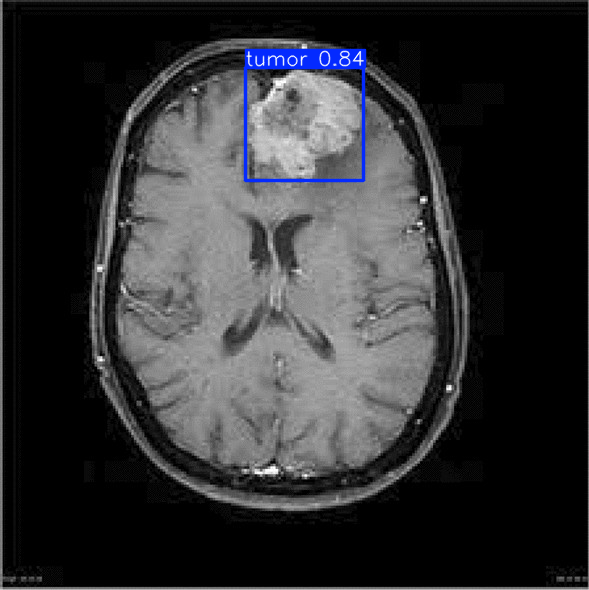

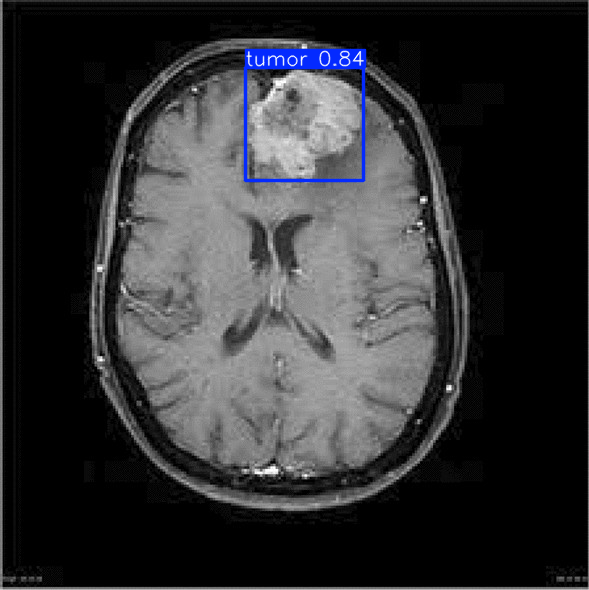

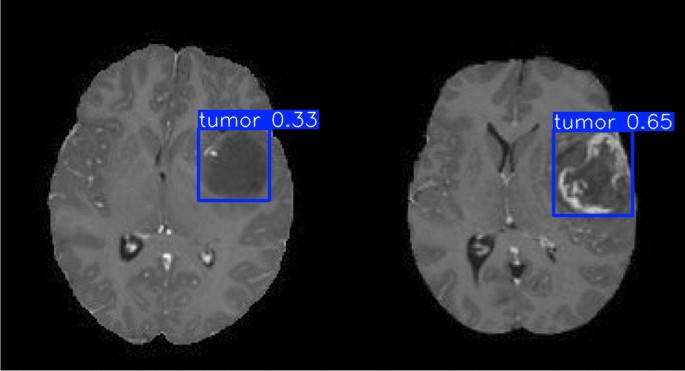

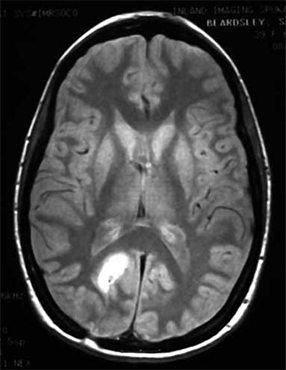

In [6]:
# Load the trained YOLO model from the specified path
yolo_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Perform inference on test images and save the results
results = yolo_model("/content/drive/MyDrive/ColabNotebooks/Folder/BRAINTUMOR/test_images", save=True)

# Display the first result
results[0].show()  # Show the first image with the detected objects

# Loop through all results and display each one
for result in results:
    result.show()  # Display each result from the inference

Show Object Coordinates


image 1/1 /content/drive/MyDrive/ColabNotebooks/Folder/BRAINTUMOR/test_images/Img2.jpg: 640x640 1 tumor, 13.7ms
Speed: 2.6ms preprocess, 13.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


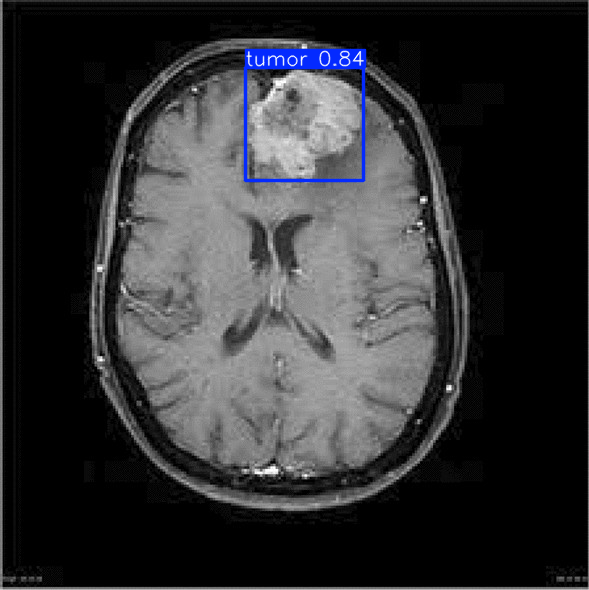

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8426], device='cuda:0')
data: tensor([[245.8792,  67.4371, 363.5663, 180.4272,   0.8426,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (590, 589)
shape: torch.Size([1, 6])
xywh: tensor([[304.7227, 123.9322, 117.6870, 112.9901]], device='cuda:0')
xywhn: tensor([[0.5174, 0.2101, 0.1998, 0.1915]], device='cuda:0')
xyxy: tensor([[245.8792,  67.4371, 363.5663, 180.4272]], device='cuda:0')
xyxyn: tensor([[0.4175, 0.1143, 0.6173, 0.3058]], device='cuda:0')


In [7]:
# Load the trained YOLO model from the specified path
yolo_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Perform inference on a specific test image and save the result
results = yolo_model("/content/drive/MyDrive/ColabNotebooks/Folder/BRAINTUMOR/test_images/Img2.jpg", save=True)

# Display the first result
results[0].show()  # Show the image with the detected objects

# Loop through all results and print the bounding boxes
for result in results:
    boxes = result.boxes  # Get the detected bounding boxes for each result
    print(boxes)          # Print the bounding box details

#Add Masking on Dectection Object by Using SAM Model

In [8]:
# Load the trained YOLO model from the specified path
yolo_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Perform inference on a specific test image
results = yolo_model("/content/drive/MyDrive/ColabNotebooks/Folder/BRAINTUMOR/test_images/img1.jpg")

# Loop through all the inference results
for result in results:
    # Extract the class IDs of the detected objects
    class_ids = result.boxes.cls.int().tolist()

    # If any objects were detected
    if len(class_ids):
        # Extract bounding box coordinates in (x1, y1, x2, y2) format
        boxes = result.boxes.xyxy

        # Use the SAM model to perform segmentation based on YOLO's bounding boxes
        sam_results = sam_model(
            result.orig_img,   # Original image from YOLO result
            bboxes=boxes,      # Bounding boxes from YOLO detections
            verbose=False,     # Suppress verbose output
            save=True,         # Save the SAM segmentation results
            device="0"         # Use GPU for faster processing
        )



image 1/1 /content/drive/MyDrive/ColabNotebooks/Folder/BRAINTUMOR/test_images/img1.jpg: 352x640 2 tumors, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/segment/predict
